# Исследование по продажам компьютерных игр

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. 
Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и
платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. 
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**Цель исследования:**

Выявить определяющие успешность игры закономерности

**Ход исследования:**
- Подготовка данных.

- Исследовательский анализ
- Составление портрета пользователя каждого региона
- Проверка гипотез
- Выводы и рекомендации

##   Подготовка данных

### Import

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

### Загрузка данных

In [2]:
try:
    df=pd.read_csv('/datasets/games.csv')
except:
    df=pd.read_csv('C:/Users/zoika/OneDrive/Рабочий стол/YP ds54/projects/1SBPROJECT/games.csv')


In [3]:
df.sample(7)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
8258,I Spy: Castle,DS,2011.0,Puzzle,0.16,0.00,0.00,0.01,NaN,tbd,E
3230,LEGO Jurassic World,3DS,2015.0,Action,0.31,0.23,0.03,0.05,NaN,7.2,E10+
7685,The Thing,XB,2002.0,Adventure,0.15,0.04,0.00,0.01,78.0,6.6,M
6363,Punch-Out!!,Wii,2007.0,Sports,0.00,0.22,0.05,0.00,NaN,NaN,NaN
10415,Mind Zero,PSV,2013.0,Role-Playing,0.05,0.00,0.04,0.02,59.0,6,T
7422,G.I. Joe: The Rise of Cobra,PS3,2009.0,Action,0.11,0.07,0.00,0.03,43.0,4.8,T
4887,Dark Souls III,XOne,2016.0,Role-Playing,0.26,0.09,0.00,0.04,87.0,8.6,NaN


Приведем названия столбцов к нижнему регистру:

In [4]:
df.columns=df.columns.str.lower()

### Типы данных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Таблица достаточно большая, содержит пропуски, неправильные форматы (например-дата и оценка пользователей). Предстоит серьезная работа по подготовке данных.

In [6]:
df['year_of_release']=pd.to_datetime(df['year_of_release'], format='%Y')

In [7]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В колонке с оценками пользователей содержится TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Она означает, что оценка еще не сформирована и будет позже.

Заменим ее сейчас на пропуски, чтобы потом заполнить медианой в зависимости от объема продаж

In [8]:
df['user_score']=pd.to_numeric(df['user_score'], errors='coerce')

In [9]:
df.info() #check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


### Пропуски

In [10]:
print('Пропуски в %:')
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

Пропуски в %:


,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,55.000000


Очень много пропусков в стоблцах с оценками и в рейтинге.

#### Столбец "rating"

Заполним пропуски в возрастном рейтинге заглушкой 'Unknown' 

In [11]:
df.loc[df['rating'].isna(),'rating']='Unknown'

In [12]:
df.head(5) #check

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown


### Посчитаем явные дубликаты

In [13]:
df.duplicated().sum()

0

### Добавим новый признак

In [14]:
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales'] #Суммарные продажи во всех регионах

## Исследовательский анализ

### Cколько игр выпускалось в разные годы

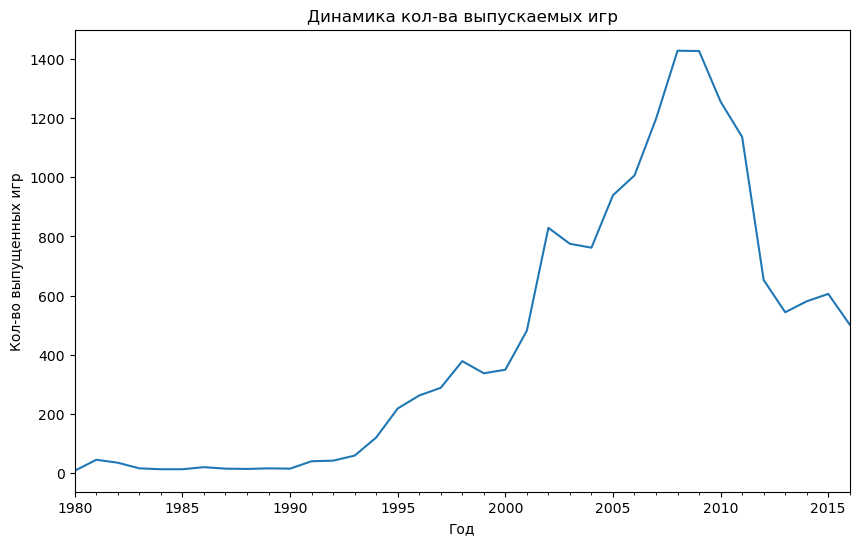

In [15]:
df.groupby(by='year_of_release')['name'].count().plot(figsize=(10,6))\
.set(title = 'Динамика кол-ва выпускаемых игр', xlabel = 'Год', ylabel = 'Кол-во выпущенных игр');

In [16]:
df=df.query('year_of_release >2000')

До 2000 года выпускалось менее 400 игр в год, поэтому данный период малоинформативен, не будем использовать его в дальнейшем  исследовании

### Как менялись продажи по платформам.
За какой характерный срок появляются новые и исчезают старые платформы?

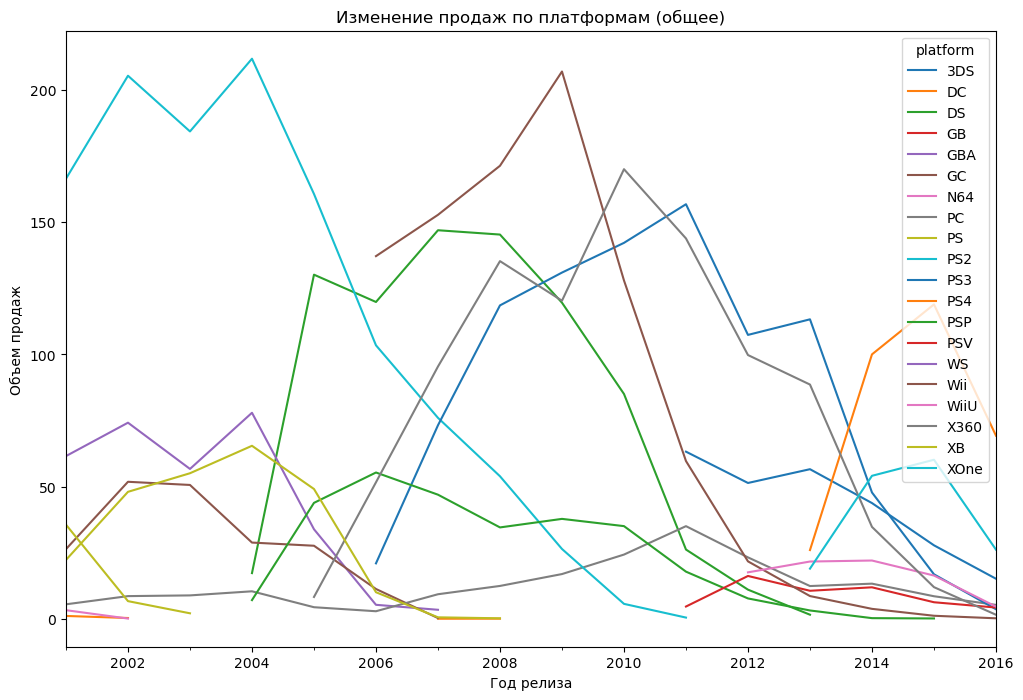

In [17]:
df.pivot_table(index='year_of_release',columns='platform', values='total_sales', \
               aggfunc=sum).plot(figsize=(12,8))\
.set(title = 'Изменение продаж по платформам (общее)', xlabel = 'Год релиза', ylabel = 'Объем продаж');

Вывод:

из графика видно, что сроки появления и исчезновения платформ - сильно отличаются. Но, если, грубо взять среднее, то  примерно 5-10 лет "живет" одна платформа. С годами, новые игры выходят чаще. Также, можно заметить, что сейчас на пике продаж платформы, выпущенные после 2013 года. А многие платформы, выпущенные ранее, уже исчезли или стремятся к этому, значит, будем считать период до 2013года - не актуальным.

In [18]:
df=df.query('year_of_release >2013')

Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 

In [19]:
df.groupby(by='platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: total_sales, dtype: float64

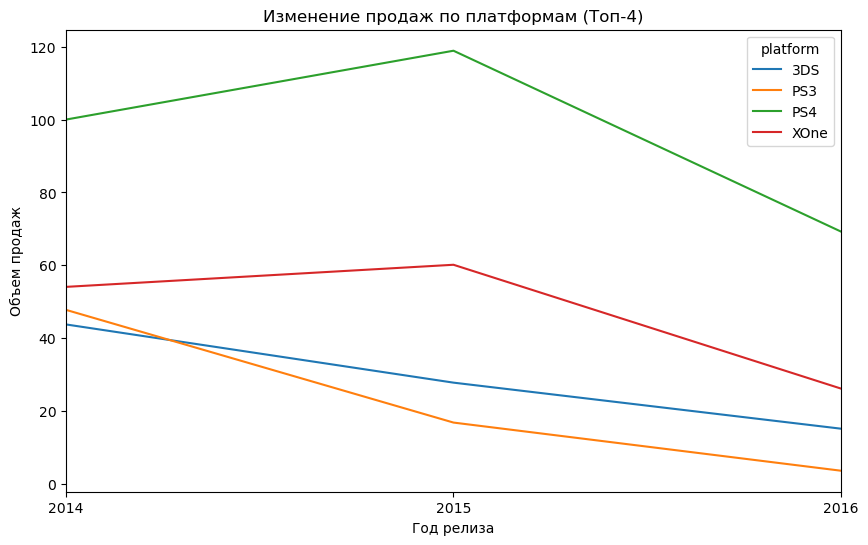

In [20]:
df_pl_top=df.query('platform ==["PS4","XOne","3DS","PS3"]')
df_pl_top_y=df_pl_top.pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc=sum);
df_pl_top_y.plot(figsize=(10,6))\
.set(title = 'Изменение продаж по платформам (Топ-4)', xlabel = 'Год релиза', ylabel = 'Объем продаж');

Вывод: На данном этапе мы выделили 4 перспективных платформы и период, который можно считать актуальным - последние 3 года

### Boxplot в разбивке по платформам

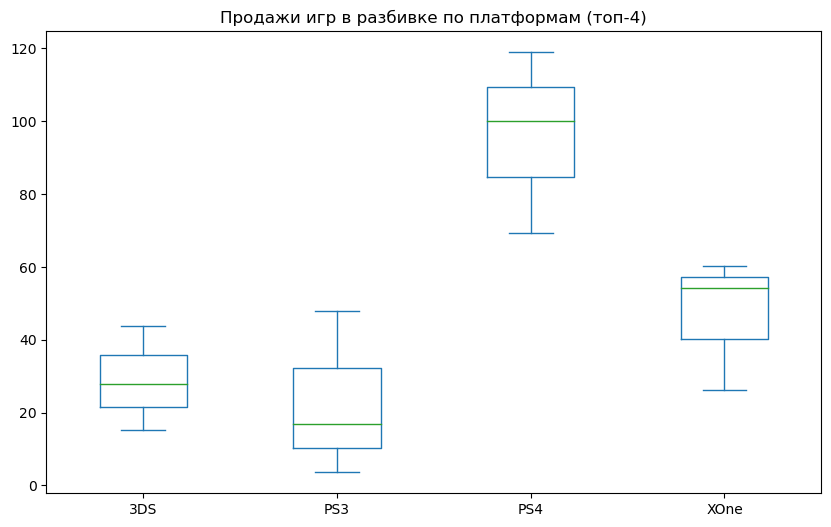

In [21]:
df_pl_top_y.plot(kind= 'box', title= 'Продажи игр в разбивке по платформам (топ-4)',figsize=(10,6));

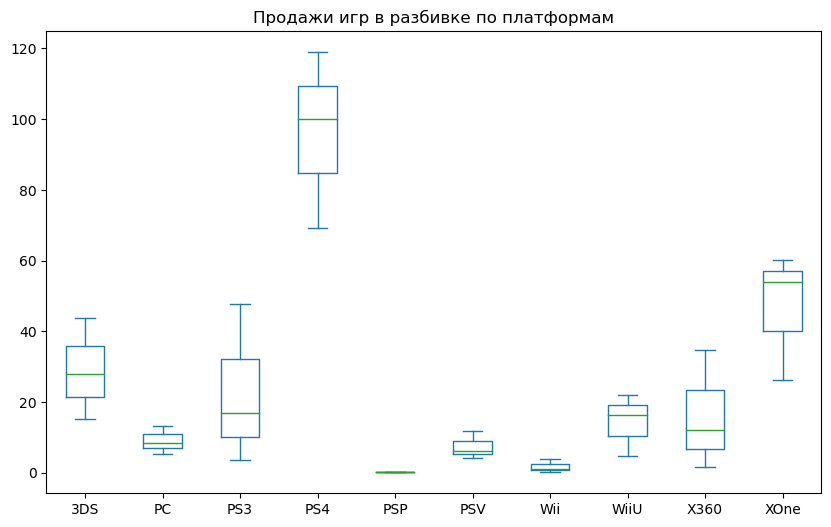

In [22]:
df.pivot_table(index='year_of_release',columns='platform', values='total_sales', aggfunc=sum)\
.plot(kind= 'box', title= 'Продажи игр в разбивке по платформам',figsize=(10,6));

Вывод: 

распределение продаж на платформе PS4 сильно отличается от остальных. Медиана находится в районе 100 миллинов проданных копий! Это значительное опережение отальных, т.к. следующий в топе это платформа XOne, и у нее медиана продаж уже почти в два раза меньше, ближе к 50 млн.

###  Влияние отзывов пользователей на продажи
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

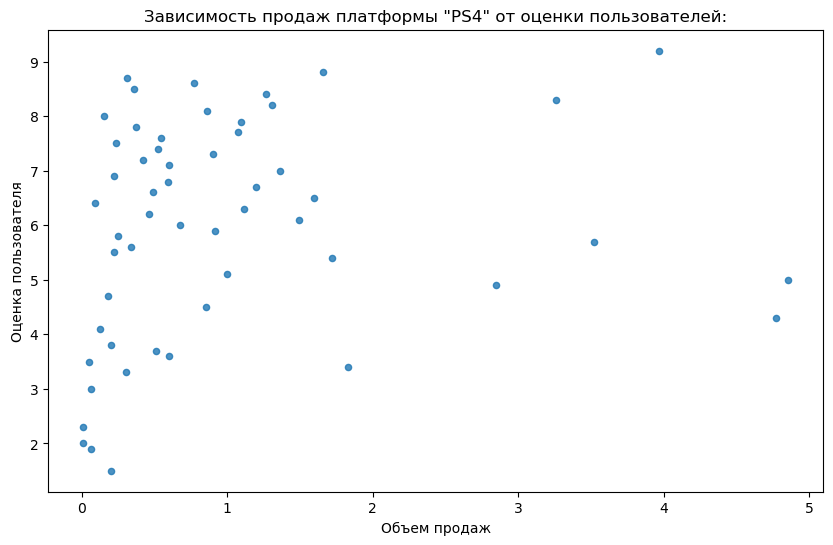

In [23]:
df_ps4=df.query('platform ==["PS4"]')
df_ps4_user=df_ps4.pivot_table(index='user_score',values='total_sales', aggfunc='mean').reset_index() 
df_ps4_user.plot(x='total_sales',y='user_score', kind='scatter', \
                  title='Зависимость продаж платформы "PS4" от оценки пользователей:', alpha=0.8,figsize=(10,6))\
.set(ylabel = 'Оценка пользователя', xlabel = 'Объем продаж');

In [24]:
df_ps4_user['total_sales'].corr(df_ps4_user['user_score'])

0.1649966750720353

### Влияние отзывов критиков на продажи

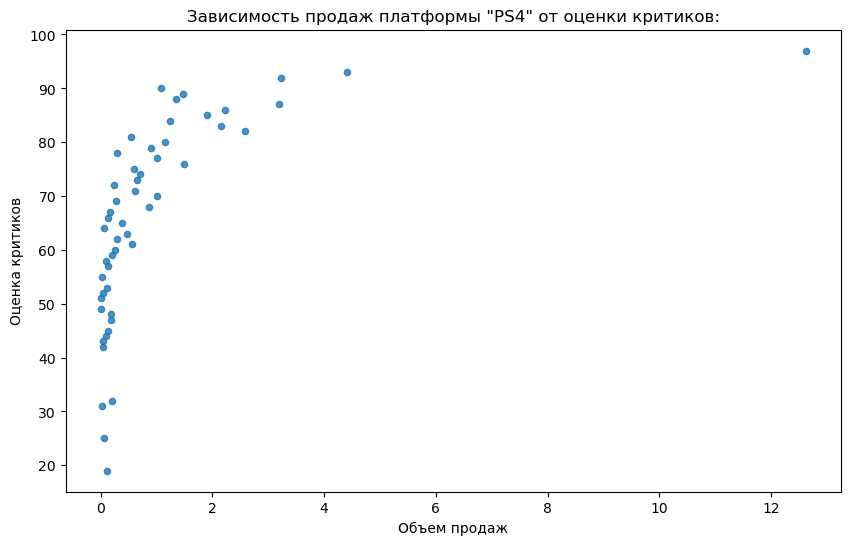

In [25]:
df_ps4_critic=df_ps4.pivot_table(index='critic_score',values='total_sales', aggfunc='mean').reset_index() 
df_ps4_critic.plot(x='total_sales',y='critic_score', kind='scatter', \
                  title='Зависимость продаж платформы "PS4" от оценки критиков:', alpha=0.8,figsize=(10,6)).set(ylabel = 'Оценка критиков', xlabel = 'Объем продаж');

In [26]:
df_ps4_critic['total_sales'].corr(df_ps4_critic['critic_score'])

0.5536810134529617

Вывод: на примере данной платформы, более отчетлива видна зависимость объема продаж от оценки критиков, чем пользователей. 

#### Сравните с корреляциями на других платформах

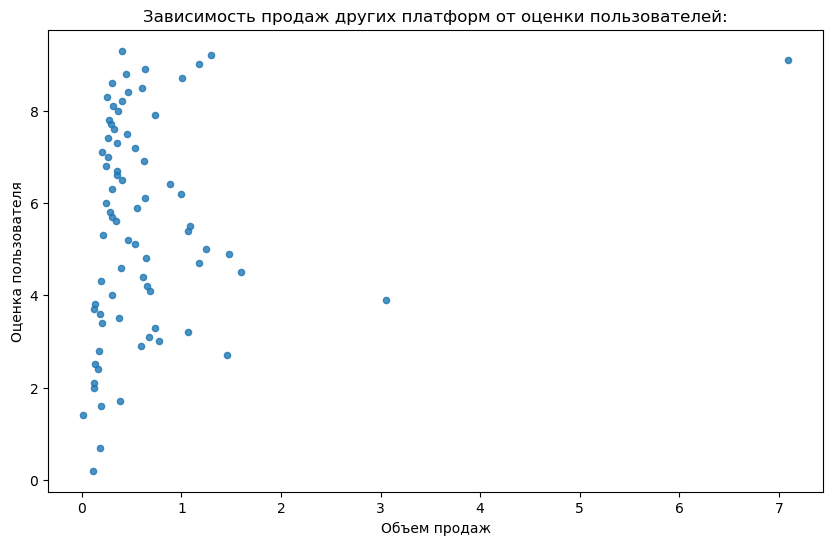

In [27]:
df_w_ps4=df.query('platform !=["PS4"]')
df_w_ps4_user=df_w_ps4.pivot_table(index='user_score',values='total_sales', aggfunc='mean').reset_index() 
df_w_ps4_user.plot(x='total_sales',y='user_score', kind='scatter', \
                  title='Зависимость продаж других платформ от оценки пользователей:', alpha=0.8,figsize=(10,6))\
.set(ylabel = 'Оценка пользователя', xlabel = 'Объем продаж');

In [28]:
df_w_ps4_user['total_sales'].corr(df_w_ps4_user['user_score'])

0.18942097958751655

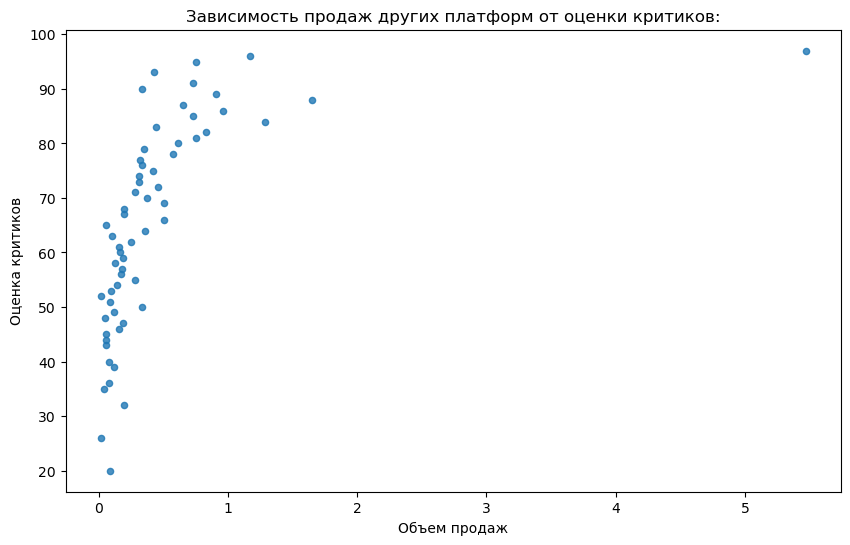

In [29]:
df_w_ps4_critic=df_w_ps4.pivot_table(index='critic_score',values='total_sales', aggfunc='mean').reset_index() 
df_w_ps4_critic.plot(x='total_sales',y='critic_score', kind='scatter', \
                  title='Зависимость продаж других платформ от оценки критиков:', alpha=0.8,figsize=(10,6)).set(ylabel = 'Оценка критиков', xlabel = 'Объем продаж');

In [30]:
df_w_ps4_critic['total_sales'].corr(df_w_ps4_critic['critic_score'])

0.530521144474773

In [31]:
df['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

In [32]:
#зациклим для нескольких платформ:

In [33]:
def corr_for_platform(dff):  
    num=2
    for pl,dff in df.groupby('platform'):
        print(pl)
        if len(dff[~dff['user_score'].isna()])<num:
            print('Не хватает данных без пропусков')
            print('-'*75)
        else:
            print('corr_user:',dff['user_score'].corr(dff['total_sales']))
            dff.plot(x='total_sales',y='user_score', kind='scatter', \
                  title='Зависимость продаж платформы от оценки пользователей:', alpha=0.8,figsize=(8,7))\
                 .set(ylabel = 'Оценка пользователя', xlabel = 'Объем продаж');
            plt.show()
        if len(dff[~dff['critic_score'].isna()])<num:
            print('Не хватает данных без пропусков')
            print('-'*70)
        else:
            print('corr_critic_score:',dff['critic_score'].corr(dff['total_sales']))
            dff.plot(x='total_sales',y='critic_score', kind='scatter', \
                  title='Зависимость продаж других платформ от оценки критиков:', \
                  alpha=0.8,figsize=(8,7)).set(ylabel = 'Оценка критиков', xlabel = 'Объем продаж')
            plt.show()
        print('-'*85)

In [34]:
 for platform,dff in df.groupby('platform'):
        print(platform)
        print('-'*25)
        display(dff)
        print('-'*65)
        

3DS
-------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unknown,11.68
96,Super Smash Bros. for Wii U and 3DS,3DS,2014-01-01,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,Unknown,7.55
108,Pokemon Sun/Moon,3DS,2016-01-01,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,Unknown,7.14
312,Monster Hunter 4 Ultimate,3DS,2014-01-01,Role-Playing,0.68,0.48,2.62,0.11,86.0,8.7,T,3.89
406,Monster Hunter X,3DS,2015-01-01,Action,0.27,0.21,2.79,0.05,NaN,NaN,Unknown,3.32
...,...,...,...,...,...,...,...,...,...,...,...,...
16599,Legends of Oz: Dorothy's Return,3DS,2014-01-01,Puzzle,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16608,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015-01-01,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16610,Kiniro no Corda 3,3DS,2015-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


-----------------------------------------------------------------
PC
-------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
458,The Sims 4,PC,2014-01-01,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05
1530,Fallout 4,PC,2015-01-01,Role-Playing,0.51,0.67,0.0,0.10,84.0,5.4,M,1.28
1677,Farming Simulator 2015,PC,2014-01-01,Simulation,0.08,1.04,0.0,0.07,NaN,NaN,Unknown,1.19
1730,Grand Theft Auto V,PC,2015-01-01,Action,0.39,0.69,0.0,0.09,96.0,7.9,M,1.17
2303,The Elder Scrolls Online,PC,2014-01-01,Role-Playing,0.32,0.51,0.0,0.07,71.0,5.7,M,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...
16509,Ride 2,PC,2016-01-01,Racing,0.00,0.01,0.0,0.00,78.0,7.9,E,0.01
16518,Rugby World Cup 2015,PC,2015-01-01,Sports,0.00,0.01,0.0,0.00,NaN,1.4,E,0.01
16617,Codename: Panzers Complete Collection,PC,2016-01-01,Strategy,0.00,0.01,0.0,0.00,NaN,NaN,Unknown,0.01
16631,The Amazing Spider-Man 2 (2014),PC,2014-01-01,Action,0.00,0.01,0.0,0.00,NaN,NaN,Unknown,0.01


-----------------------------------------------------------------
PS3
-------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
180,Minecraft,PS3,2014-01-01,Misc,2.03,2.37,0.00,0.87,NaN,NaN,Unknown,5.27
255,Call of Duty: Advanced Warfare,PS3,2014-01-01,Shooter,1.56,1.93,0.19,0.68,NaN,4.8,M,4.36
264,FIFA 15,PS3,2014-01-01,Sports,0.58,3.02,0.04,0.64,NaN,4.5,E,4.28
552,FIFA 16,PS3,2015-01-01,Sports,0.41,1.84,0.05,0.40,NaN,3.2,E,2.70
1021,Watch Dogs,PS3,2014-01-01,Action,0.56,0.81,0.10,0.27,NaN,5.1,M,1.74
...,...,...,...,...,...,...,...,...,...,...,...,...
16558,Naruto Shippuden: Ultimate Ninja Storm Collection,PS3,2016-01-01,Action,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16638,Tour de France 2014,PS3,2014-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014-01-01,Action,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


-----------------------------------------------------------------
PS4
-------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unknown,14.63
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014-01-01,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016-01-01,Adventure,0.00,0.00,0.01,0.00,69.0,7.5,Unknown,0.01
16503,Shin Hayarigami 2,PS4,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16526,Dungeons 2,PS4,2016-01-01,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016-01-01,Action,0.01,0.00,0.00,0.00,51.0,5.5,M,0.01


-----------------------------------------------------------------
PSP
-------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
11107,Pro Yaky? Spirits 2014,PSP,2014-01-01,Sports,0.0,0.0,0.09,0.0,NaN,NaN,Unknown,0.09
11486,Uta no Prince-Sama: All Star After Secret,PSP,2015-01-01,Action,0.0,0.0,0.08,0.0,NaN,NaN,Unknown,0.08
13451,Toukiden Kiwami,PSP,2014-01-01,Action,0.0,0.0,0.05,0.0,NaN,NaN,Unknown,0.05
15026,Juusanshi Engi Engetsu Sangokuden 2,PSP,2014-01-01,Action,0.0,0.0,0.02,0.0,NaN,NaN,Unknown,0.02
15508,Gakuen K: Wonderful School Days,PSP,2014-01-01,Adventure,0.0,0.0,0.02,0.0,NaN,NaN,Unknown,0.02
15996,Harukanaru Toki no Naka de 6,PSP,2015-01-01,Action,0.0,0.0,0.02,0.0,NaN,NaN,Unknown,0.02
16069,Meiji Toukyou Renka: Twilight Kiss,PSP,2015-01-01,Action,0.0,0.0,0.02,0.0,NaN,NaN,Unknown,0.02
16129,Shinobi Koutsutsu,PSP,2014-01-01,Adventure,0.0,0.0,0.01,0.0,NaN,NaN,Unknown,0.01
16233,Geten no Hana: Yume Akari,PSP,2014-01-01,Misc,0.0,0.0,0.01,0.0,NaN,NaN,Unknown,0.01
16313,Bakumatsu Rock,PSP,2014-01-01,Action,0.0,0.0,0.01,0.0,NaN,NaN,Unknown,0.01


-----------------------------------------------------------------
PSV
-------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
868,Minecraft,PSV,2014-01-01,Misc,0.18,0.64,0.90,0.24,NaN,NaN,Unknown,1.96
3086,Freedom Wars,PSV,2014-01-01,Role-Playing,0.15,0.10,0.32,0.08,73.0,8.3,T,0.65
3127,Borderlands 2,PSV,2014-01-01,Shooter,0.32,0.16,0.01,0.15,64.0,7.6,M,0.64
3381,FIFA 15,PSV,2014-01-01,Sports,0.08,0.35,0.05,0.12,NaN,3.1,E,0.60
4722,God Eater 2: Rage Burst,PSV,2015-01-01,Role-Playing,0.00,0.03,0.37,0.01,NaN,8.1,T,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...
16699,The Longest 5 Minutes,PSV,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16703,Strawberry Nauts,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16707,Aiyoku no Eustia,PSV,2014-01-01,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01


-----------------------------------------------------------------
Wii
-------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
850,Just Dance 2015,Wii,2014-01-01,Misc,0.99,0.85,0.0,0.17,NaN,8.4,E10+,2.01
2179,Just Dance 2016,Wii,2015-01-01,Misc,0.41,0.46,0.0,0.08,NaN,NaN,E10+,0.95
2180,Skylanders: Trap Team,Wii,2014-01-01,Action,0.41,0.46,0.0,0.08,NaN,NaN,E10+,0.95
3611,FIFA 15,Wii,2014-01-01,Sports,0.15,0.37,0.0,0.04,NaN,4.3,E,0.56
7991,How to Train Your Dragon 2,Wii,2014-01-01,Adventure,0.04,0.13,0.0,0.01,NaN,NaN,E10+,0.18
8009,Just Dance 2017,Wii,2016-01-01,Misc,0.06,0.11,0.0,0.01,NaN,NaN,E10+,0.18
8941,Skylanders: SuperChargers,Wii,2015-01-01,Action,0.02,0.12,0.0,0.01,NaN,NaN,Unknown,0.15
13570,Disney Planes Fire & Rescue,Wii,2014-01-01,Action,0.00,0.04,0.0,0.00,NaN,NaN,Unknown,0.04
14682,Barbie and Her Sisters Puppy Rescue,Wii,2015-01-01,Action,0.00,0.03,0.0,0.00,NaN,NaN,E,0.03
16144,Penguins of Madagascar,Wii,2014-01-01,Action,0.00,0.01,0.0,0.00,NaN,NaN,E,0.01


-----------------------------------------------------------------
WiiU
-------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
110,Mario Kart 8,WiiU,2014-01-01,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09
216,Super Smash Bros. for Wii U and 3DS,WiiU,2014-01-01,Fighting,2.60,1.08,0.81,0.38,NaN,NaN,Unknown,4.87
247,Splatoon,WiiU,2015-01-01,Shooter,1.54,1.18,1.46,0.26,81.0,8.5,E10+,4.44
424,Super Mario Maker,WiiU,2015-01-01,Platform,1.18,0.89,0.94,0.20,88.0,8.7,E,3.21
1174,Mario Party 10,WiiU,2015-01-01,Misc,0.69,0.53,0.24,0.12,66.0,6.5,E,1.58
...,...,...,...,...,...,...,...,...,...,...,...,...
16376,Dragon Quest X: All in One Package,WiiU,2015-01-01,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16412,Legend of Kay Anniversary,WiiU,2015-01-01,Action,0.00,0.01,0.00,0.00,67.0,7.1,E10+,0.01
16420,Mario vs. Donkey Kong: Tipping Stars,WiiU,2015-01-01,Puzzle,0.00,0.00,0.01,0.00,70.0,7.4,E,0.01
16510,Art Academy: Home Studio,WiiU,2015-01-01,Misc,0.00,0.00,0.01,0.00,82.0,8.3,E,0.01


-----------------------------------------------------------------
X360
-------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
263,Call of Duty: Advanced Warfare,X360,2014-01-01,Shooter,2.77,1.11,0.0,0.40,NaN,4.9,M,4.28
494,FIFA 15,X360,2014-01-01,Sports,0.79,1.92,0.0,0.21,NaN,4.2,E,2.92
829,Madden NFL 15,X360,2014-01-01,Sports,1.77,0.06,0.0,0.22,NaN,5.5,E,2.05
898,Destiny,X360,2014-01-01,Shooter,1.31,0.43,0.0,0.18,NaN,4.7,T,1.92
1049,Call of Duty: Black Ops 3,X360,2015-01-01,Shooter,1.14,0.40,0.0,0.16,NaN,NaN,Unknown,1.70
...,...,...,...,...,...,...,...,...,...,...,...,...
15142,Rugby Challenge 3,X360,2016-01-01,Sports,0.00,0.02,0.0,0.00,NaN,NaN,E,0.02
15376,Back to the Future: The Game,X360,2015-01-01,Adventure,0.02,0.00,0.0,0.00,NaN,7.5,Unknown,0.02
15578,Kung Fu Panda: Showdown of Legendary Legends,X360,2015-01-01,Action,0.00,0.02,0.0,0.00,NaN,6.8,E10+,0.02
16294,Adventure Time: The Secret of the Nameless,X360,2014-01-01,Adventure,0.01,0.00,0.0,0.00,NaN,NaN,Unknown,0.01


-----------------------------------------------------------------
XOne
-------------------------


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015-01-01,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,Unknown,7.39
165,Grand Theft Auto V,XOne,2014-01-01,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014-01-01,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015-01-01,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015-01-01,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016-01-01,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016-01-01,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16645,ZombiU,XOne,2016-01-01,Action,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16660,Prison Architect,XOne,2016-01-01,Action,0.01,0.00,0.00,0.00,74.0,6.7,Unknown,0.01


-----------------------------------------------------------------


3DS
corr_user: 0.2151932718527028


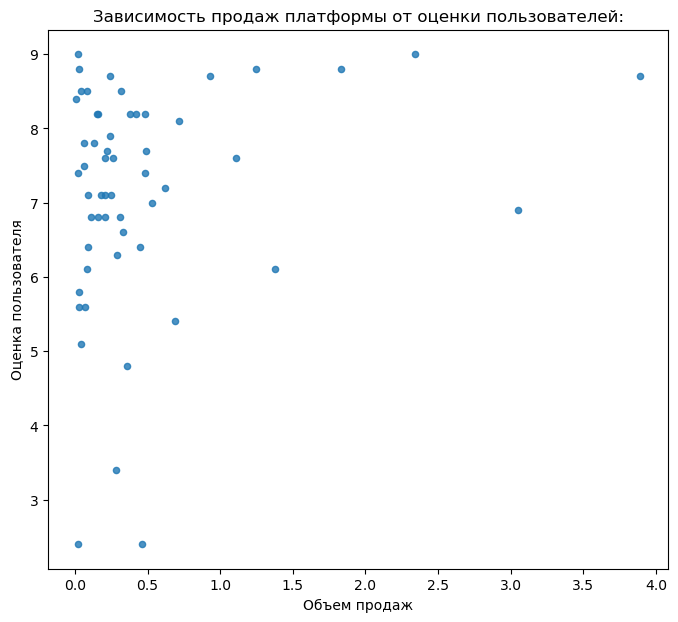

corr_critic_score: 0.314117492869051


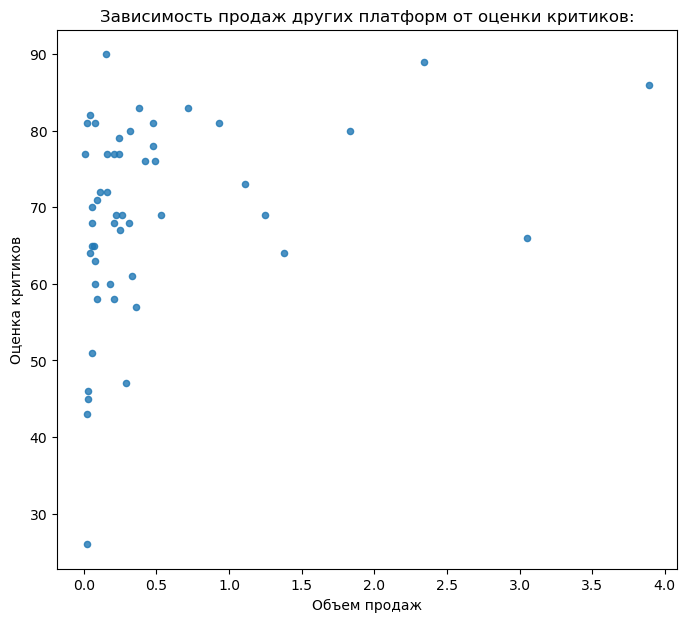

-------------------------------------------------------------------------------------
PC
corr_user: -0.07159665703472451


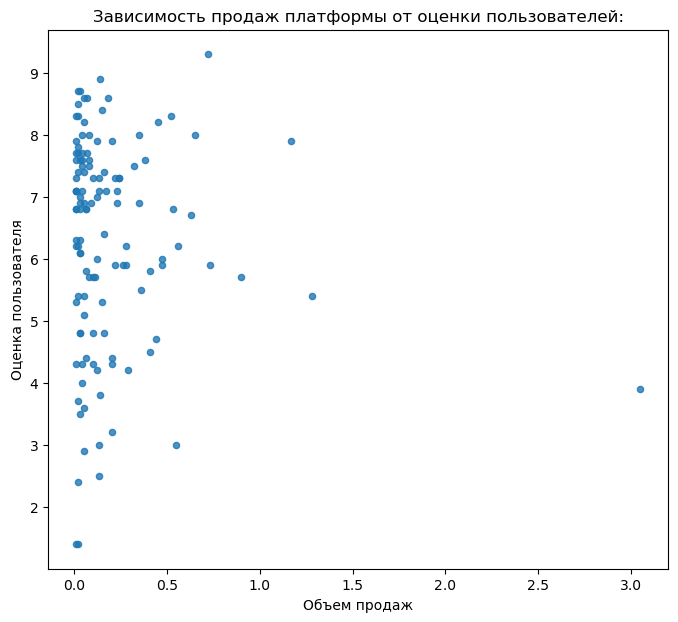

corr_critic_score: 0.17463413769350036


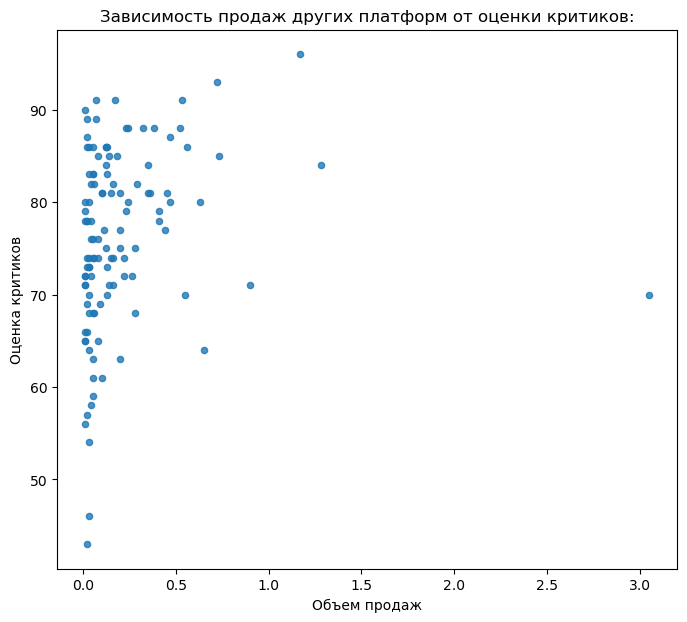

-------------------------------------------------------------------------------------
PS3
corr_user: -0.16676141347662118


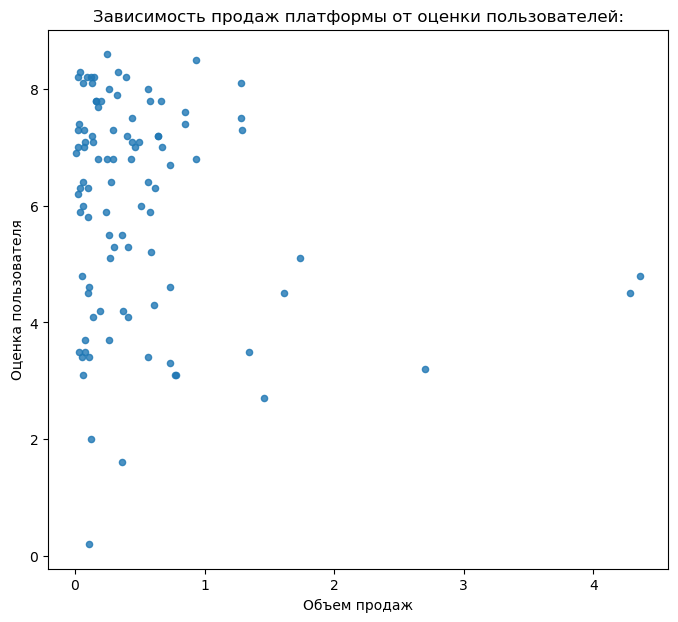

corr_critic_score: 0.44657460493190704


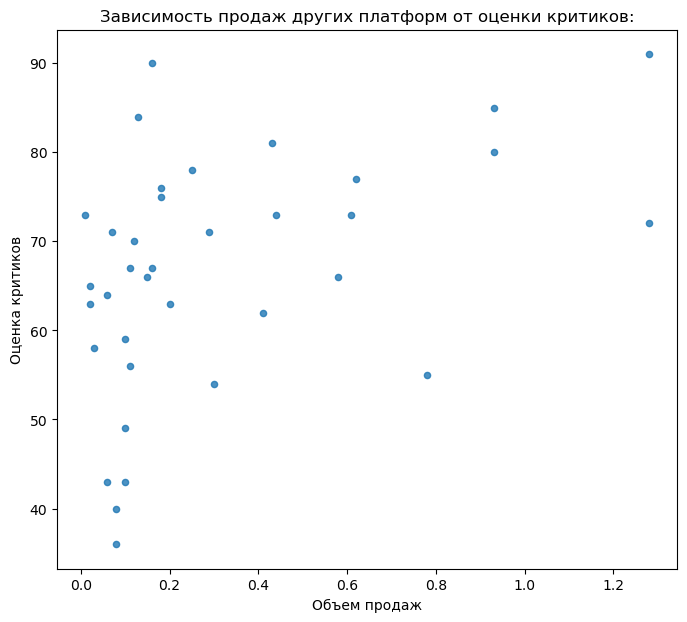

-------------------------------------------------------------------------------------
PS4
corr_user: -0.040131589472697356


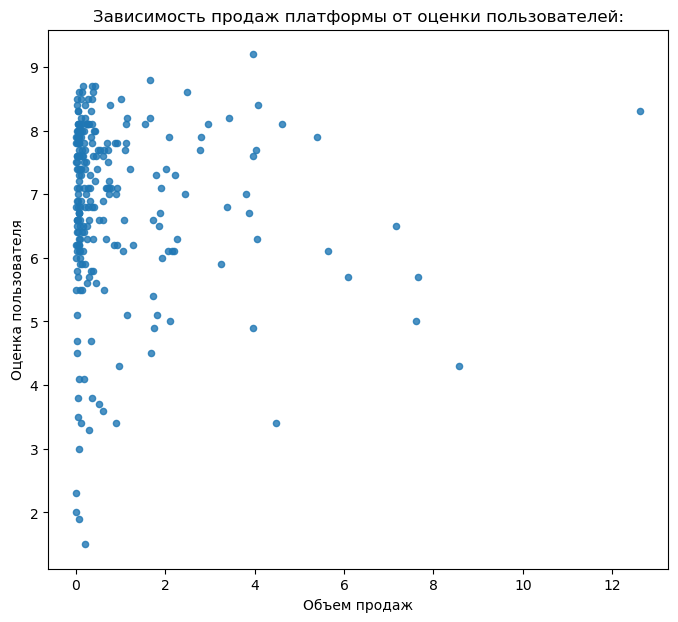

corr_critic_score: 0.40266141068104083


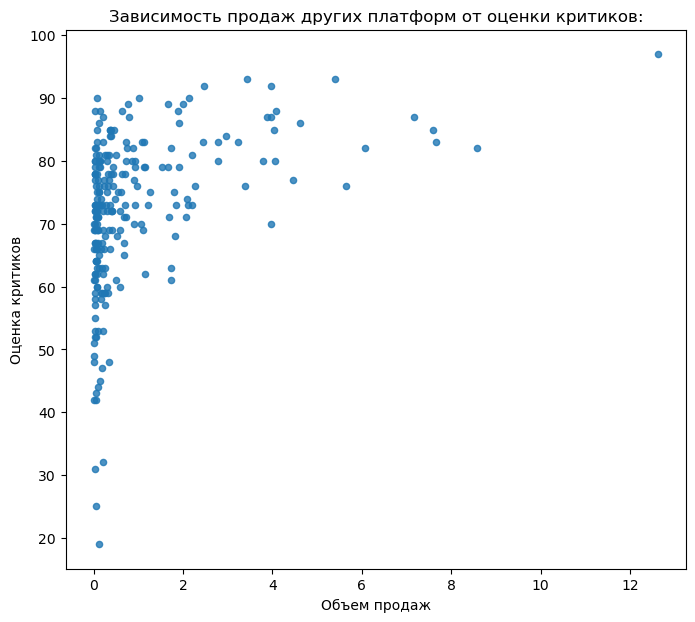

-------------------------------------------------------------------------------------
PSP
Не хватает данных без пропусков
---------------------------------------------------------------------------
Не хватает данных без пропусков
----------------------------------------------------------------------
-------------------------------------------------------------------------------------
PSV
corr_user: -0.16845504978064446


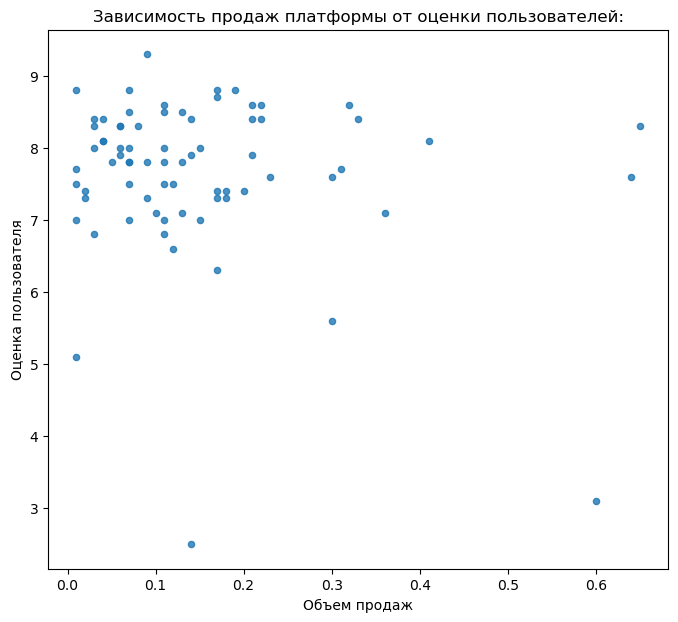

corr_critic_score: 0.04266490657009526


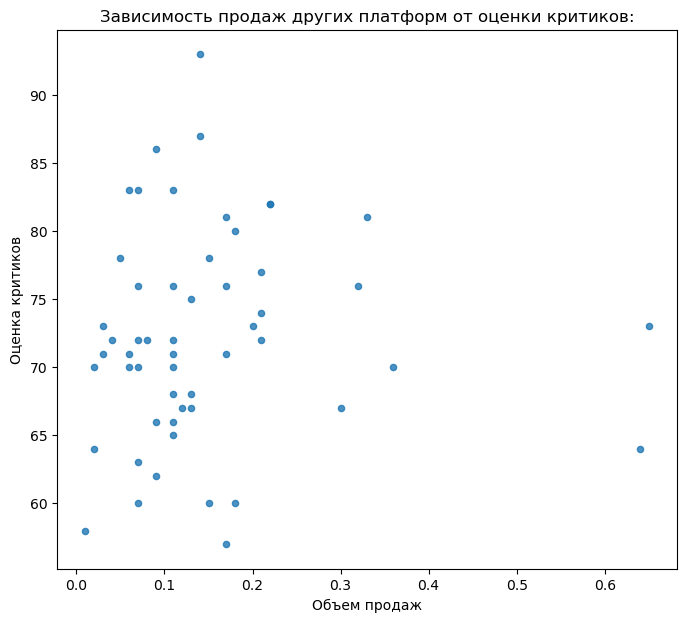

-------------------------------------------------------------------------------------
Wii
corr_user: 1.0


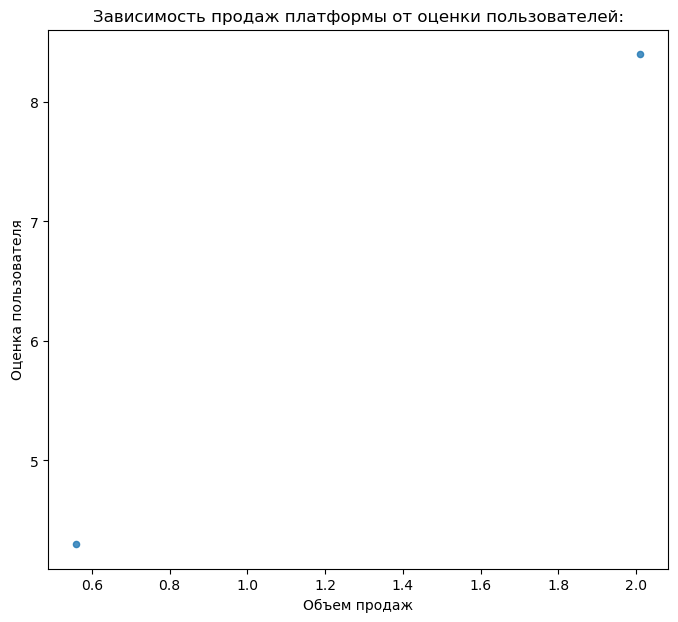

Не хватает данных без пропусков
----------------------------------------------------------------------
-------------------------------------------------------------------------------------
WiiU
corr_user: 0.40792645792170773


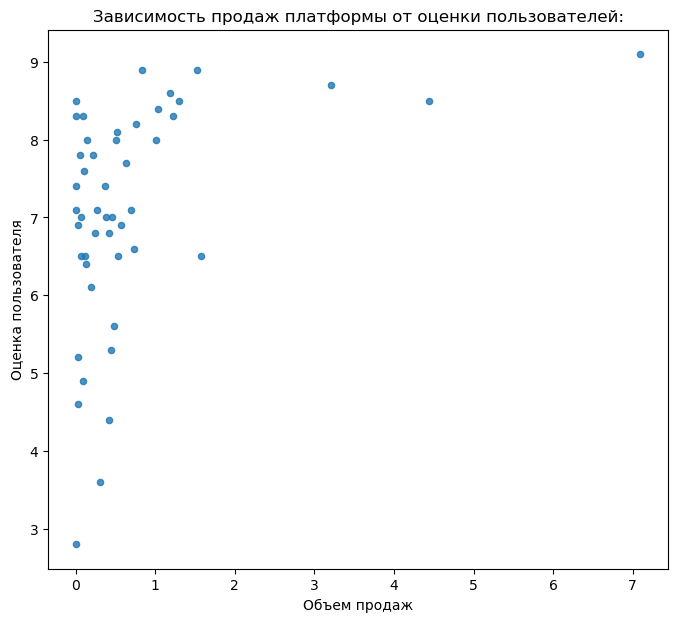

corr_critic_score: 0.370201412480884


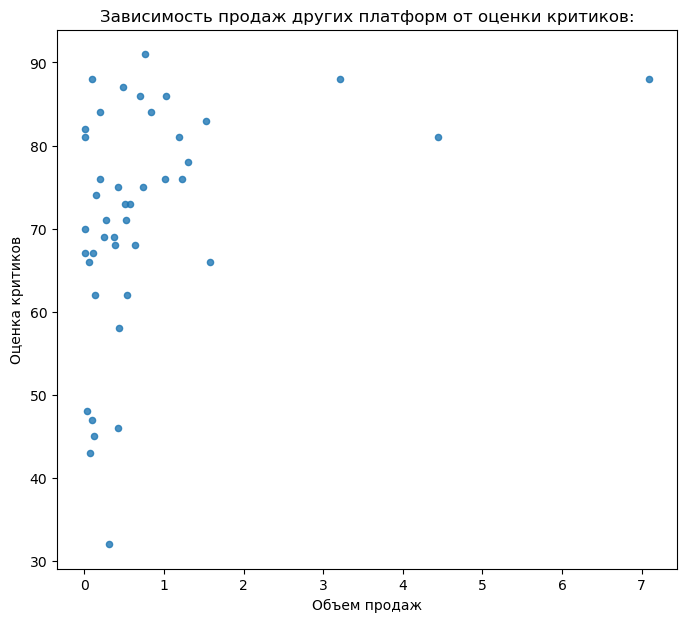

-------------------------------------------------------------------------------------
X360
corr_user: -0.138444570945665


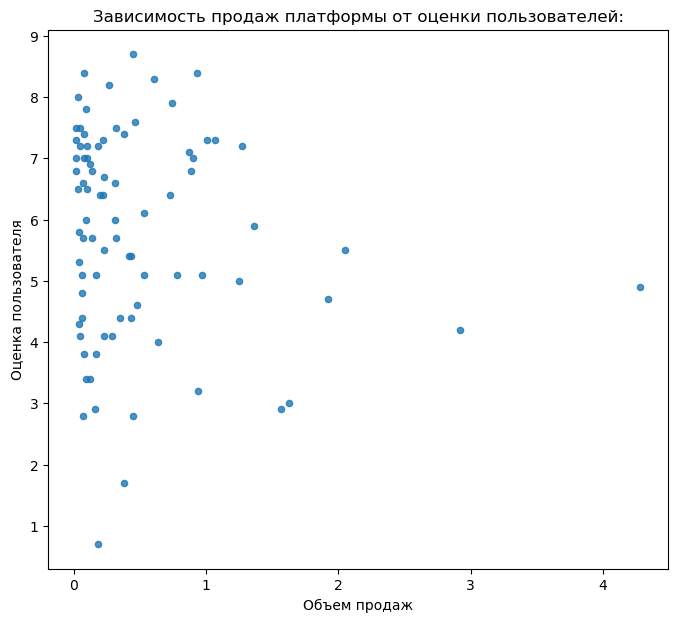

corr_critic_score: 0.5257228356581523


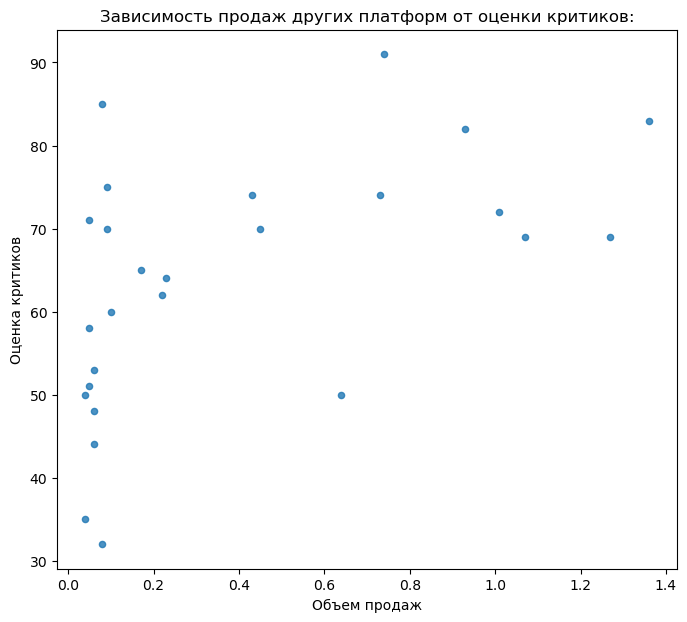

-------------------------------------------------------------------------------------
XOne
corr_user: -0.0703839280647581


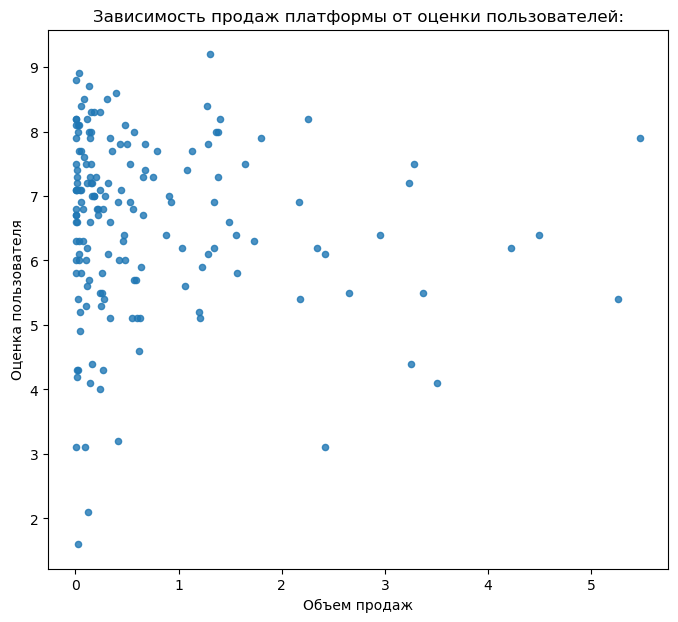

corr_critic_score: 0.42867694370333226


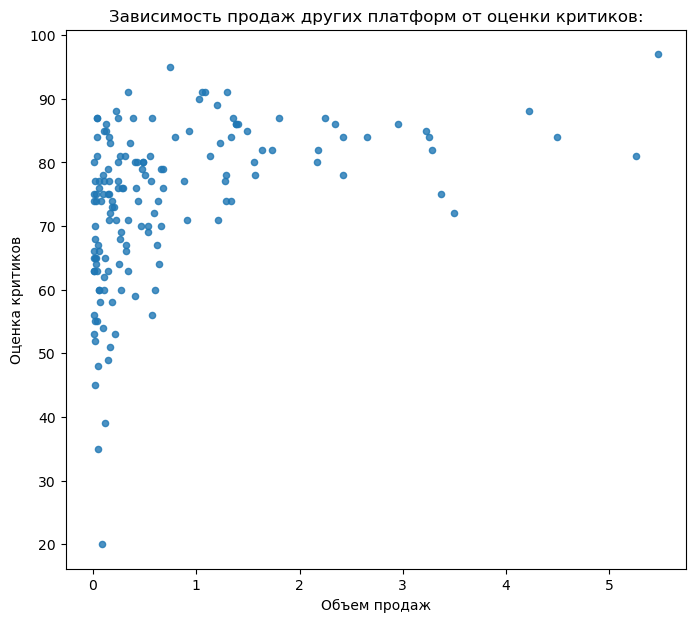

-------------------------------------------------------------------------------------


In [35]:
corr_for_platform(df)

Вывод: на других платформах, зависимость объема продаж от оценки пользователей, прослеживается немного лучше, а от оценки критиков - немного хуже, но в целом, коэффициенты корреляции - близки. 

### Общее распределение игр по жанрам

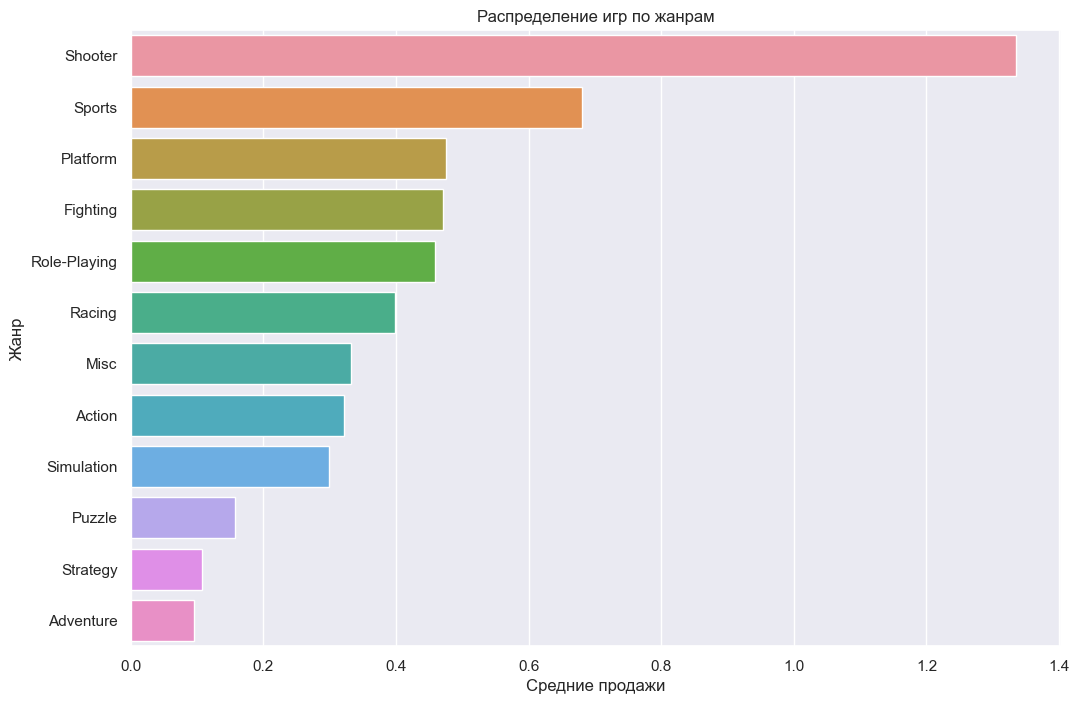

In [36]:
df_genre=df.pivot_table(index='genre',values='total_sales').reset_index().sort_values(by='total_sales', ascending=False)
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(y=df_genre['genre'] , x=df_genre['total_sales']).set_title("Распределение игр по жанрам")
plt.ylabel('Жанр');
plt.xlabel('Средние продажи');

Вывод: Шутер сильно выделяется по количеству средних продаж. А пазлы,стратегии и приключению продаются хуже всего. 

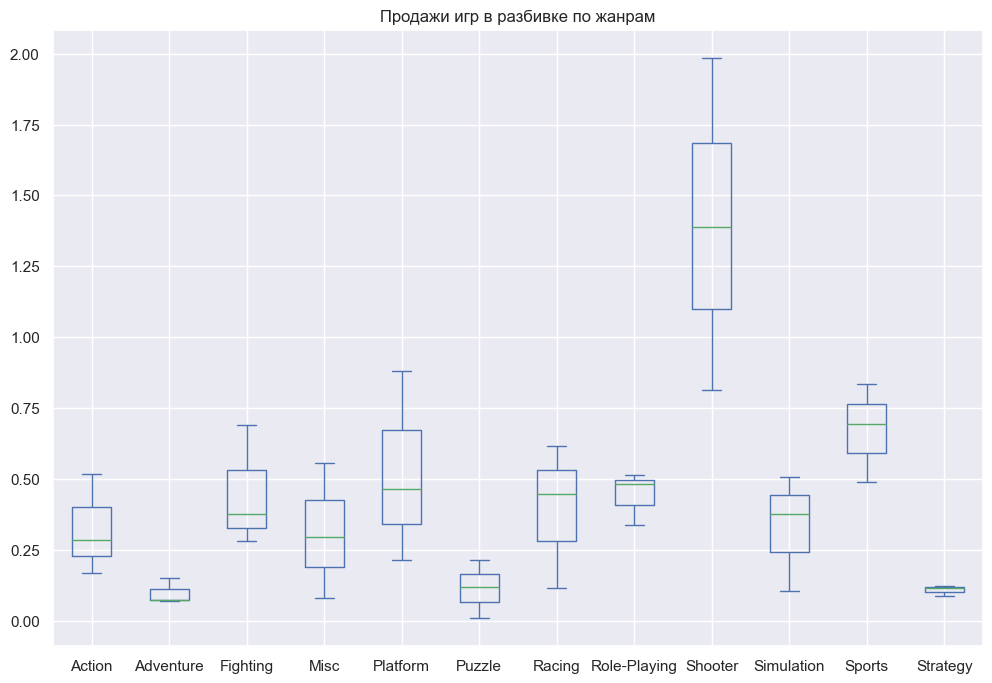

In [37]:
df.pivot_table(index='year_of_release',columns='genre', values='total_sales')\
.plot(kind= 'box', title= 'Продажи игр в разбивке по жанрам',figsize=(12,8));

Вывод: Медиана средних продаж в жанре Шутер в несколько раз превышает медиану продаж в любом другом жанре

## Портрет пользователя каждого региона

Определим портрет пользователя для каждого региона (NA, EU, JP):

### Самые популярные жанры (топ-5)

In [38]:
df_user_genre=df.pivot_table(index=['genre'],values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')\
                              .sort_values(by='na_sales', ascending=False).head(6)

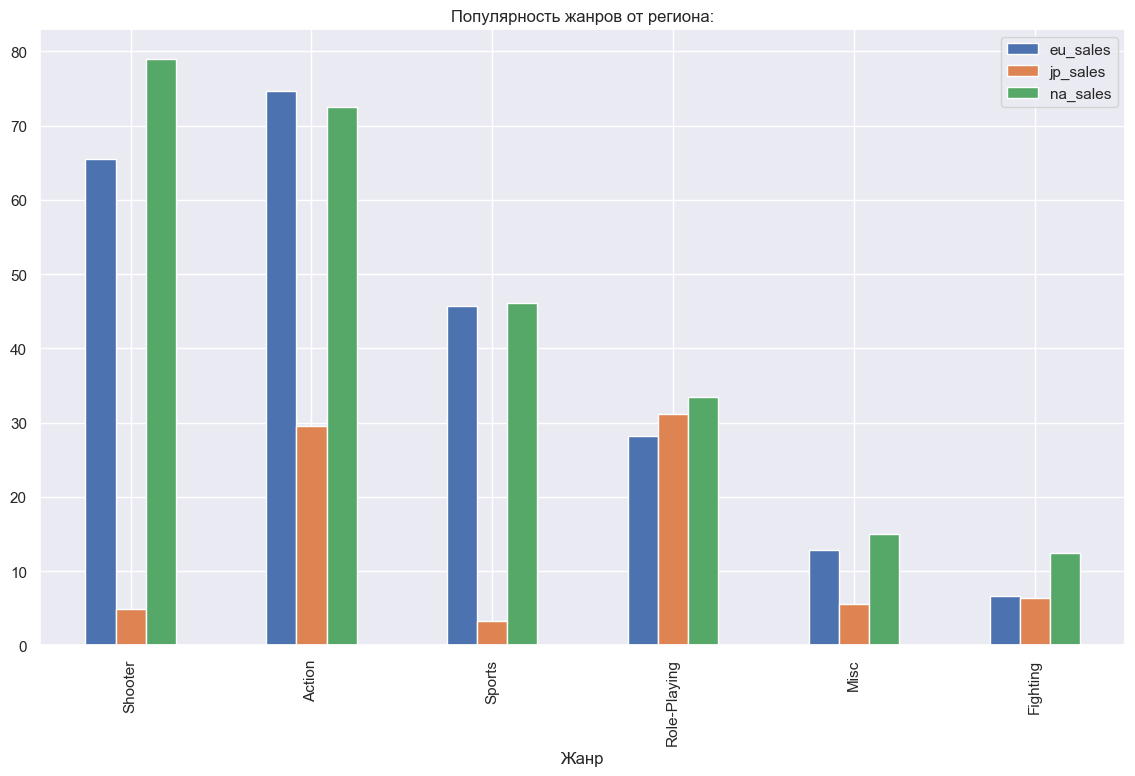

In [39]:
df_user_genre.plot(kind='bar',figsize=(14,8), title='Популярность жанров от региона:')
plt.xlabel('Жанр');
plt.show()

In [40]:
df_tops=pd.DataFrame()
df_tops['na']=pd.Series(df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5))
df_tops.reset_index(inplace= True)
df_tops=df_tops.drop('na', axis=1)
df_tops.columns=['NA']
df_tops

,NA
0,Shooter
1,Action
2,Sports
3,Role-Playing
4,Misc


In [41]:
df_topsEU=pd.DataFrame(df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5))
df_topsEU.reset_index(inplace= True)
df_topsEU=df_topsEU.drop('eu_sales', axis=1)
df_topsEU.columns=['Europe']
df_topsEU

,Europe
0,Action
1,Shooter
2,Sports
3,Role-Playing
4,Racing


In [42]:
df_tops['E']=df_topsEU['Europe'] #просто добавляем столбец по идексам
df_tops

,NA,E
0,Shooter,Action
1,Action,Shooter
2,Sports,Sports
3,Role-Playing,Role-Playing
4,Misc,Racing


In [43]:
df_tops.merge(df_topsEU,  right_index=True,  left_index=True)# соединяем по индексу

,NA,E,Europe
0,Shooter,Action,Action
1,Action,Shooter,Shooter
2,Sports,Sports,Sports
3,Role-Playing,Role-Playing,Role-Playing
4,Misc,Racing,Racing


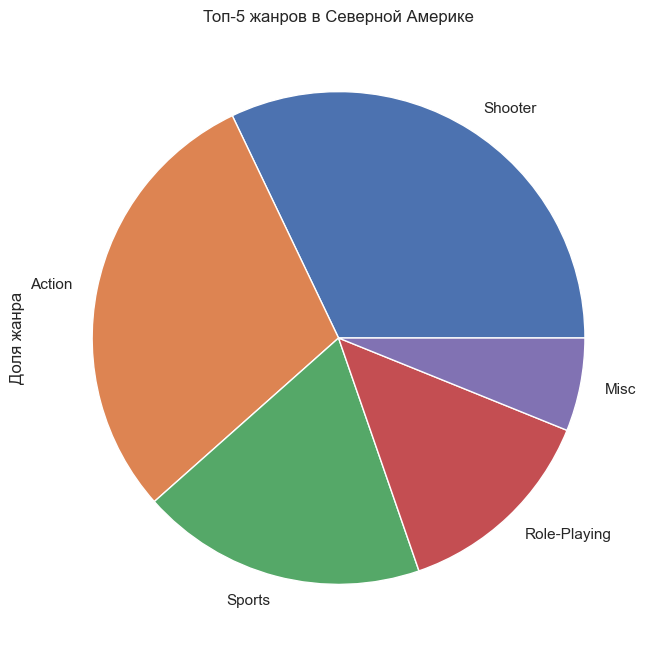

In [44]:
df.groupby('genre')['na_sales'].sum().sort_values(ascending=False)\
.head(5).plot(kind = 'pie',title='Топ-5 жанров в Северной Америке');
plt.ylabel('Доля жанра');

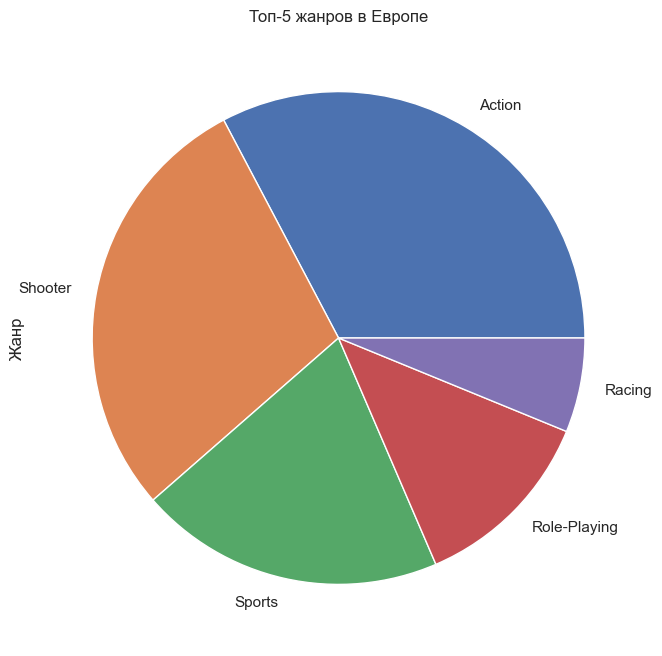

In [45]:
df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)\
.plot(kind = 'pie',title='Топ-5 жанров в Европе');
plt.ylabel('Жанр');

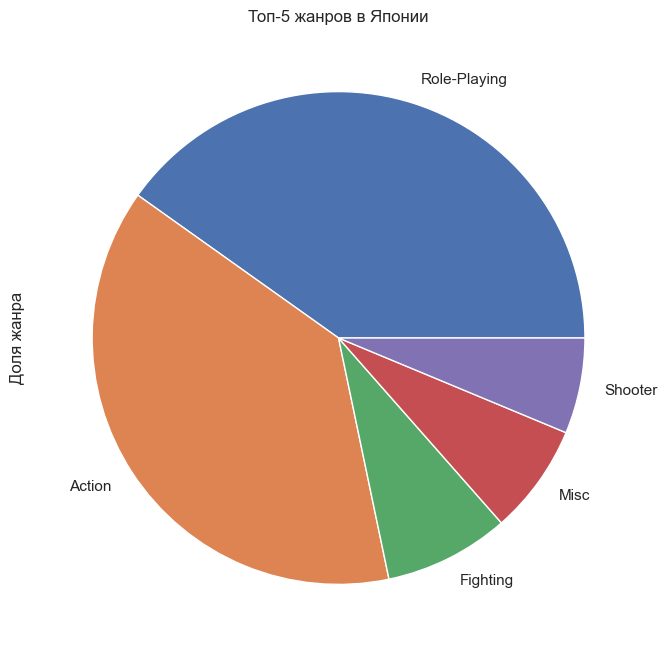

In [46]:
df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)\
.plot(kind = 'pie',title='Топ-5 жанров в Японии');
plt.ylabel('Доля жанра');

Вывод: 

для пользователей из Cеверной Америки самыми популярными жанрами стали: 
- Shooter
- Action
- Sports	
- Role-Playing
- Misc

из Европы: 
- Action
- Shooter
- Sports	
- Role-Playing		
- Racing

А у японских игроков сильно выделяются два фаворита, это Role-Playing и Action, а топ-5:
- Role-Playing
- Action
- Fighting	
- Misc	
- Shooter

### Самые популярные платформы (топ-5)

In [47]:
df_user_platform=df.pivot_table(index=['platform'],values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')\
                              .sort_values(by='na_sales', ascending=False)#топ-5 na_sales

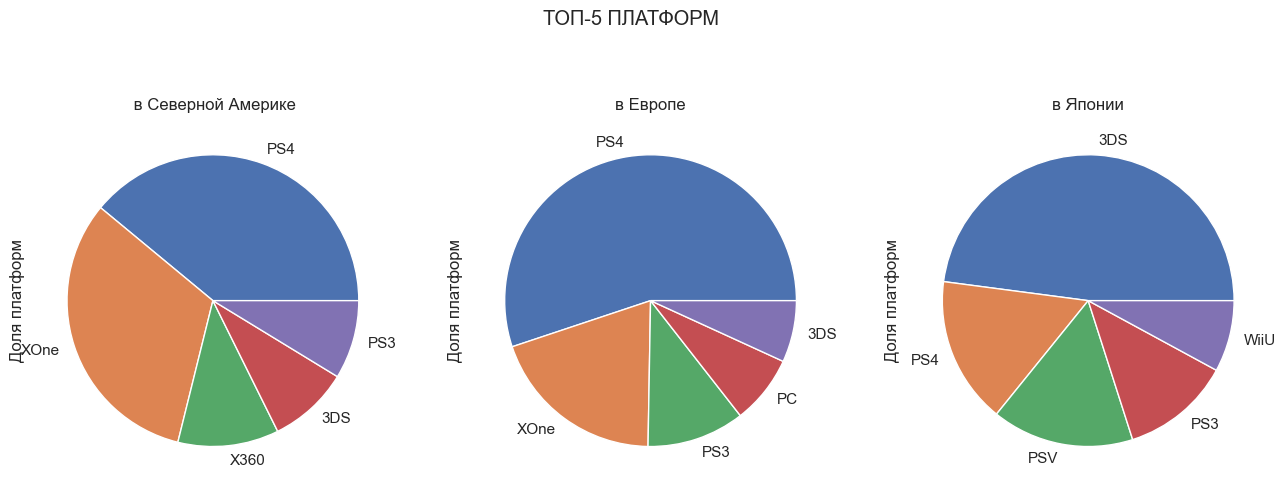

In [48]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)# строк, столбцов, номер элемента
df.groupby('platform')['na_sales'].sum().sort_values(ascending=False)\
.head(5).plot(kind = 'pie',title=' в Северной Америке')
plt.ylabel('Доля платформ');

plt.subplot(1, 3, 2)
df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)\
.head(5).plot(kind = 'pie',title='в Европе');
plt.ylabel('Доля платформ');

plt.subplot(1, 3, 3)
df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)\
.head(5).plot(kind = 'pie',title='в Японии');
plt.ylabel('Доля платформ');
plt.suptitle("ТОП-5 ПЛАТФОРМ");


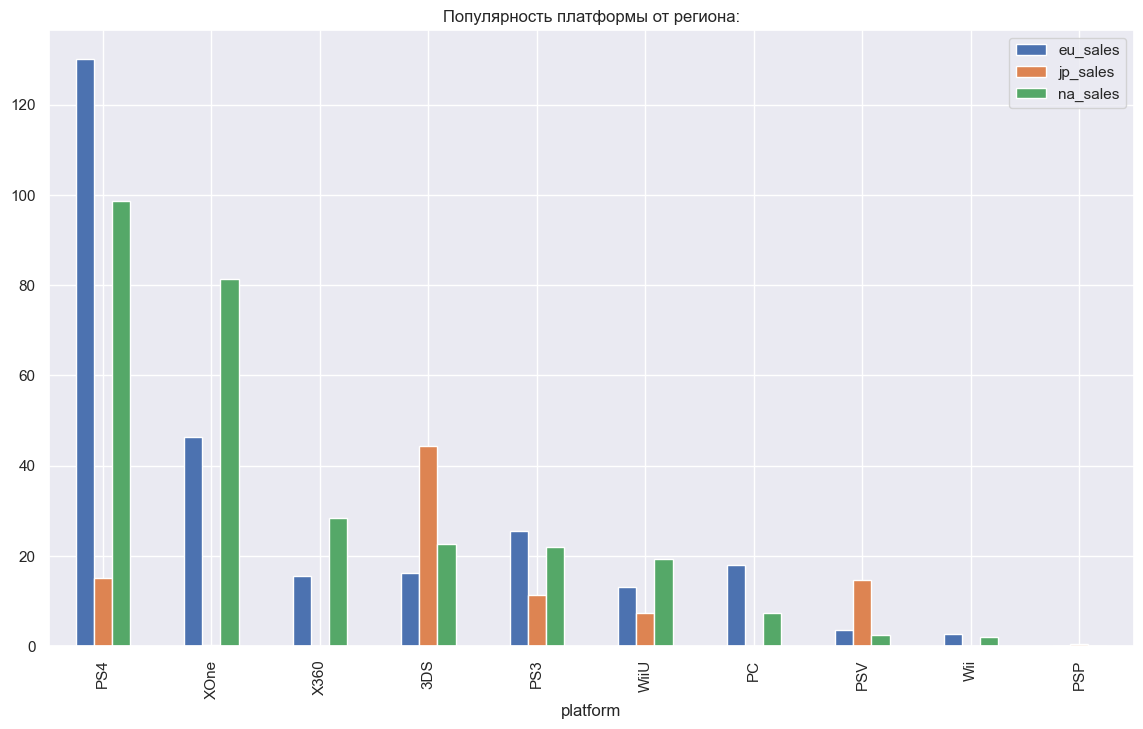

In [49]:
df_user_platform.plot(kind='bar',figsize=(14,8), title='Популярность платформы от региона:')
plt.show()

Вывод:В Северной Америке и Европе топ-2 совпадает, а в Японии, почему-то не взлетел XOne, зато сильно лидирует платформа 3DS


### Влияние рейтинга ESRB на продажи

In [50]:
df_user_rating=df.pivot_table(index=['rating'],values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')\
                              .sort_values(by='na_sales', ascending=False)#топ-5 na_sales

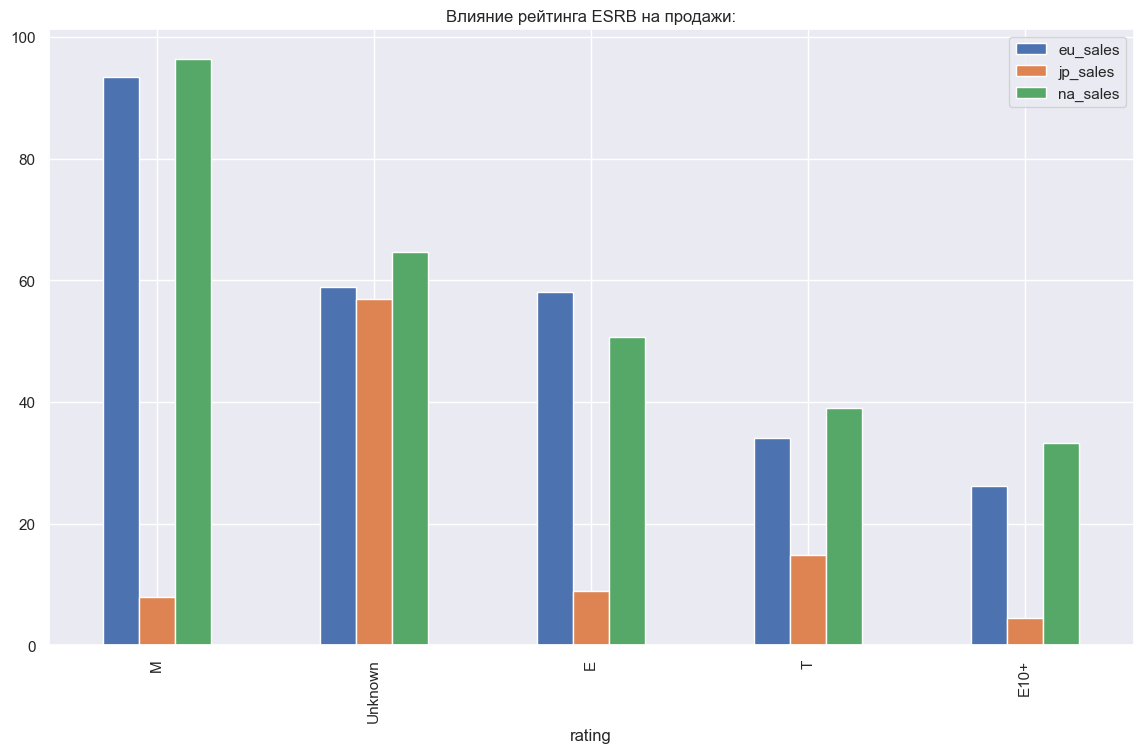

In [51]:
df_user_rating.plot(kind='bar',figsize=(14,8), title='Влияние рейтинга ESRB на продажи:')
plt.show()

Во всех регионах - самые мальнькие продажи для рейтинга "Е10+" (для игороков старше 10 лет). В Европе и Северной Америке больше всего продается игр с рейтингом "М" для взрослых. А самый продаваемый возрастной рейтинг в Японии остался неизвестным из-за пропусков в данных.

## Проверка гипотез

### user_score для платформ Xbox One и PC 

Сформулируем гипотезы:

Н0: средние двух генеральных совокупностей user_score для платформ Xbox One и PC  равны между собой.

Н1: средние двух генеральных совокупностей user_score для платформ Xbox One и PC  не равны между собой.

Alpha-уровень значимости выберем = 0.05

Для проверки гипотезы выберем  t-тест Студента. В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: "scipy.stats.ttest_ind()".
В аргументе укажем equal_var = False, т.к. предполагаем, что дисперсии генеральных совокупностей могут отличаться 

In [52]:
user_rating=df.query('platform==["XOne","PC"]')
user_rating_XOne = df.query('(platform=="XOne")&(~user_score.isna())')['user_score']
user_rating_PC = df.query('(platform=="PC")&(~user_score.isna())')['user_score']

In [53]:
results = st.ttest_ind(user_rating_XOne, user_rating_PC, equal_var = False)
alpha = 0.05   # alpha = задайте значение уровня значимости
print(results.pvalue)
if results.pvalue<0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


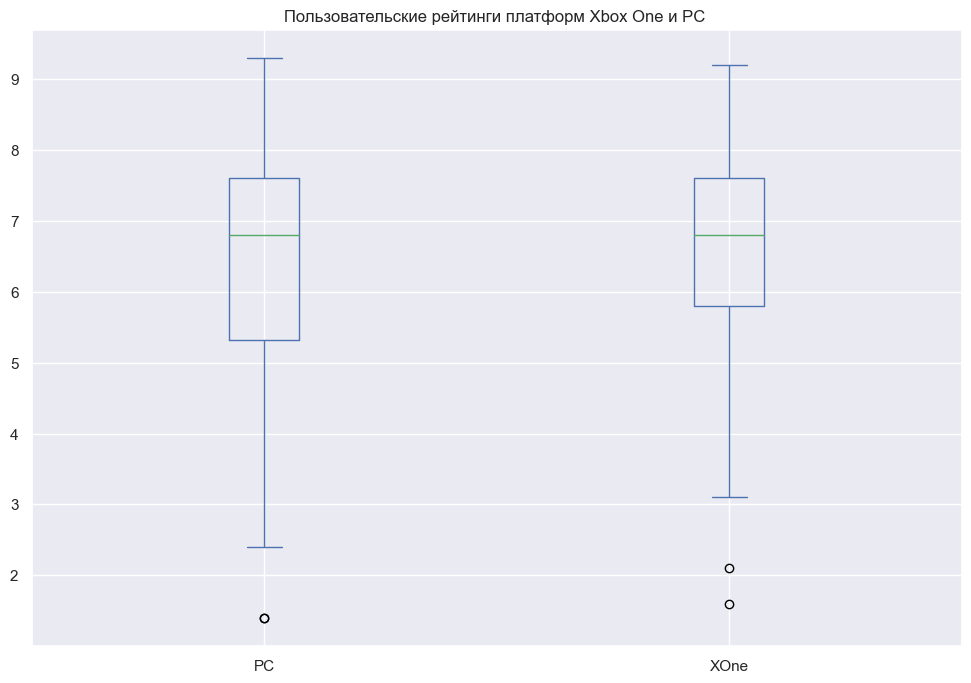

In [54]:
user_rating.pivot_table(index='name',columns='platform', values='user_score').plot(kind= 'box', title= 'Пользовательские рейтинги платформ Xbox One и PC ',figsize=(12,8));

In [55]:
user_rating_XOne.mean()

6.594545454545453

In [56]:
user_rating_PC.mean()

6.298360655737703

Вывод: Средний пользовательский рейтинг для платформ Xbox One и PC равны между собой

### user_score для жанров Action и Sports 

Сформулируем гипотезы:

Н0: средние двух генеральных совокупностей user_score для жанров Action и Sports  равны между собой.

Н1: средние двух генеральных совокупностей user_score для жанров Action и Sports  не равны между собой.

Alpha-уровень значимости выберем = 0.05

Для проверки гипотезы выберем  t-тест Студента. В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: "scipy.stats.ttest_ind()".
В аргументе укажем equal_var = False, т.к. предполагаем, что дисперсии генеральных совокупностей могут отличаться 

In [57]:
user_rating_Action = df.query('(genre=="Action")&(~user_score.isna())')['user_score']
user_rating_Sports = df.query('(genre=="Sports")&(~user_score.isna())')['user_score']

results = st.ttest_ind(user_rating_Action, user_rating_Sports, equal_var = False)
alpha = 0.05   # alpha = задайте значение уровня значимости
print(results.pvalue)
if results.pvalue<0.05:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Отвергаем нулевую гипотезу


Вывод: Нулевую гипотезу о равенстве средних мы отвергли, значит верна альтернативная гипотеза:средние пользовательские рейтинги для жанров Action и Sports не равны между собой

## Выводы

В ходе работы над проектом были решены следующие задачи:

- заполнены пропущенные значения, там где это необходимо и возможно
- изменены типы данных там, где это необходимо
- посчитаны суммарные продажи по всем регионам
- изучено, сколько игр выпускалось в разные годы
- изучено, как менялись продажи по платформам
- изучено, влияние отзывов пользователей на продажи
- изучено, влияние отзывов критиков на продажи
- изучено, общее распределение игр по жанрам
- составлен портрет пользователя для каждого региона
- проверена гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC
- проверена гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports 

Изучив взаимосвязи с объемом продаж, выявлено, что наибольшее влияние на количество проданных игр влияет оценка игры экспертами, также имеет значение возрастной рейтинг игры и платформа, для которой игра разработана.Выделяются жанры с наибольшими продажами, это Шутер. А пазлы, приключения и стратегии продаются хуже всего.

Рекомендуется, при составлении рекламной компании на следующий год, считать актуальными данные за последние три года, и обратить внимание на 4 платформы с топовыми продажами за указаный период:

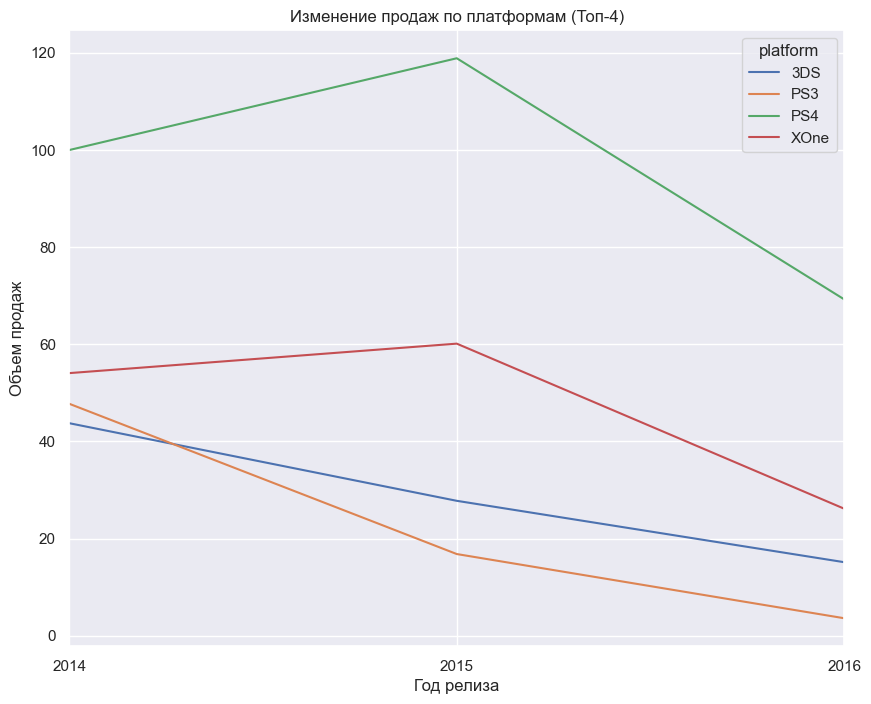

In [58]:
df_pl_top_y.plot(figsize=(10,8))\
.set(title = 'Изменение продаж по платформам (Топ-4)', xlabel = 'Год релиза', ylabel = 'Объем продаж');